---

# 5. 强化学习平台


在第三部分中，我们使用手动编程的方法（hard coding）来编写了一个简单的增强学习处理迷宫问题的案例。真实情况下，我们遇到的问题更加复杂，需要将程序编写过程进行简化，将更多的注意力放到问题的解决方案上来。机器学习的一个定义就是不需要用显著编程的方式来实现运算过程，由此我们需要强化学习的平台，以便代码结构更加简单。

对于强化学习，有以下平台可供使用：

- OpenAI Gym是一个用于构建、评估和比较强化学习算法的工具包，能够兼容TensorFlow、Theano、Keras等任何框架下编写的算法，该工具包简单易懂，无需对智能体的结构进行任何假设，并对所有强化学习任务提供了接口。更多信息参看[帮助文档](http://gym.openai.com/)。


- OpenAI Universe是OpenAI Gym的扩展，提供了从简单到实时复杂的各种环境下训练和评估智能体的功能，可以无限访问许多游戏环境。利用Universe，任何程序都可以转换为一个Gym环境，而无需访问程序内部、源代码或者API，因为Universe是通过一个计算远程桌面的虚拟网络来自动启动程序的。


- DeepMind Lab是基于AI智能体的另一个优秀的研究平台，提供了丰富的模拟环境，可以作为运行多种强化学习算法的实验平台，同时它具有高度可定制化和可扩展性，可视化内容非常丰富，且具有科幻风格和逼真效果。


- RL-Glue提供了连接智能体、环境和程序的接口，即使这些都是采用不同编程语言写的也可以。另外还可以在完成任务时与他人共享智能体和环境，由于具有兼容性，因此大大提高了可重用性。


- Project Malmo是微软在Minecraft基础上开发的另一种AI实验平台，可为定制化环境提供良好的灵活性，同时还适用于复杂环境。另外，还允许超频，这使得程序员能够比标准Minecraft更快地显示场景，然而Malmo目前只能提供Minecraft游戏环节，相比于OpenAI Universe 支持的环境广度有所不足。


- VizDoom是一种基于Doom的AI平台，它支持在多智能体和竞争环境下测试智能体，但是它只能够使用Doom游戏环境。

在本课程中，我们在这只关注OpenAI Gym，有兴趣的同学可以关注其他平台。


## 5.1 OpenAI Gym简介





2015年，特斯拉CEO Elon Musk，LinkedIn创始人Reid Hoffman及PayPal创始人Peter Thiel等人共同宣布创立非盈利的研究公司OpenAI。

OpenAI是地球上最强的人工智能研究团队之一，致力于进行非监督式学习和强化学习的研究。OpenAI的使命和长期目标是以最大限度地造福全人类的方式发展人工智能。OpenAI Gym 是一个用于开发和比较RL算法的工具包，与其他的数值计算库兼容，如tensorflow 或者theano 库。现在主要支持的是python 语言，以后将支持其他语言。

OpenAI Gym包含两部分：

+ Gym开源程序包含一个测试问题集，每个问题定义为环境，可以用于自己的强化学习算法开发，这些环境有共享的接口，允许用户设计通用的算法，例如：Atari、CartPole等

+ OpenAI Gym服务提供一个站点和API，允许用户对自己训练的算法进行性能比较

我们在接下来的分析路径是，首先以单摆车案例来熟悉Gym环境以及强化学习的算法，然后再依据单摆车案例的强化学习逻辑处理金融金融案例。

## 5.2 Gym安装

如果没有安装gym需要安装
!pip install gym

或在Anaconda命令窗口中执行以下命令：

git clone https://github.com/openai/gym  </p>
cd gym  
pip install -e .[all]</p>

## 5.3 实验：了解Gym仿真环境

【实验目的】

+ 了解OpenAI Gym仿真环境

+ 了解OpenAI Gym仿真环境的模拟案例

+ 了解Gym源文件的查看方法以及源文件的内容

【实验步骤】

+ 键入代码，实现相同返回结果

+ 浏览网站，对Gym环境有概括性了解


查看仿真环境列表：

In [38]:
# 显示所有仿真环境
from gym import envs
print(list(envs.registry.items()))

[('CartPole-v0', EnvSpec(id='CartPole-v0', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=195.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='CartPole', version=0)), ('CartPole-v1', EnvSpec(id='CartPole-v1', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='CartPole', version=1)), ('MountainCar-v0', EnvSpec(id='MountainCar-v0', entry_point='gym.envs.classic_control.mountain_car:MountainCarEnv', reward_threshold=-110.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='MountainCar', version=0)), ('Mo

如需查看源文件，执行以下命令：

In [39]:
import gym
print (gym.__file__)

/Users/mie/opt/anaconda3/lib/python3.9/site-packages/gym/__init__.py


将以上结果拷贝至文件浏览器中，可查看相应的源文件说明。在接下来的部分中会用到此功能。

## 5.4. 实验：单摆车问题

### 5.4.1 案例描述

【实验概述】

单摆车（CartPole）是Gym仿真环境的经典案例。强化学习中的元素在单摆车仿真实验中是这样描述的：

+ 状态

    状态用四个变量来描述：[$x,\hat{x},\theta,\hat{\theta}$]
    
    
$x$表示小车在轨道上的位移（Displacement）。注意，我们将位移定义为一个向量，初始位置其值为0，右侧为正，左侧为负。

$\hat{x}$表示小车速度（Cart velocity），右侧为正，左侧为负。

$\theta$表示杆子与竖直方向的夹角（Angle of the pole with the vertical line）。

$\hat{\theta}$表示角度变化的速率（Rate of change of the angle）。

   
    
+ 动作

    动作只有两个0和1。动作0表示向左拉动小车，动作1表示向右拉动小车。每次执行动作0或者1可将小车的位置和单摆偏离角改变，每次改变的结果根据当时小车的状态来确定；当小车状态相同时，每次执行相同的动作得到的结果也相同。
    
    
+ 回报

    回报较为简单，即执行一次动作，得到回报+1，没有其他回报值
    
    
+ 目标

    将执行动作后所得到的回报进行加总，总回报的最大值是目标，也就是长期累积执行的动作次数
    
    
+ 策略

    要得到的策略是将单摆车所处的状态及其所对应的相对动作（0或者1）匹配。也就是在给定状态的情况下，找到对应的策略能够描述应该执行哪个动作
    

这里，我们除了定义强化学习的要素以外，还需要额外定义任务的成功或者失败。我们把一次任务称为一“回合”（episode）,回合可以理解为玩游戏的一局，成功就是通关，失败就是中途结束，无论是成功还是失败，都需要重新再来，开启一个新的回合。对于单摆车实验，成功和失败是这样定义的：

成功：
+ 执行的动作数目过200时步（累积回报率超过200），或者说在小车上施加动作达到200次

失败：

只要有一次执行动作后，小车的新状态发生一下情形之一：


+ 小车位移$x$大于2.4
+ 单摆角度$\theta$大于$12^\circ$（弧度制0.2093）



【实验目的】

+ 通过Gym实验了解OpenAI Gym仿真环境，了解单摆车工作原理

+ 熟悉单摆车基本函数及其功能

+ 能够将强化学习的要素与单摆车问题相对应

+ 按照单摆车成功与失败条件进行程序模拟

【实验要求】

+ 仔细阅读题目条件，<font color=red>逐行键入代码</font>
+ 键入过程中，如果编译报错，需要仔细阅读错误提示，<font color=red>不能囫囵吞枣直接拷贝代码</font>
+ 分析每行代码的输入和输出（如果有）
+ 遇到函数关系较为复杂时，注意函数之间的接口，确保接口数据类型一一对应
+ 如果有函数功能不清楚，需要单独提取并查询其函数内在逻辑



【实验步骤】


In [40]:
# 导入gym环境
import gym

# 关闭所有警告
import warnings 
warnings.filterwarnings('ignore')

# 引入画图工具
import matplotlib.pyplot as plt
# matplotlib.use('tkagg')

# 设置显示精度以及不适用科学计数法显示小数
import numpy as np
np.set_printoptions(precision=4, suppress=True)

# 禁止hash随机化，使得实验可复现
import os
os.environ['PYTHONHASHSEED'] = '0'

In [41]:
# 创建单摆车的仿真环境
env = gym.make('CartPole-v0')

In [42]:
# 重置环境。每次执行env.reset（）函数，环境都将小车的状态进行重置，得到一个新的四元组状态
env.reset()

(array([-0.0248, -0.0033, -0.0005,  0.0123], dtype=float32), {})

In [43]:
# 环境渲染，产生一个窗口显示单摆车的状态
env.render()

# 引入时间库，图像显示5秒钟后关闭
import time
time.sleep(5)

# 关闭仿真环境，关闭渲染图景
env.close()

In [44]:
# 查看状态空间与动作空间
print("状态空间：",env.observation_space)
print("动作空间：",env.action_space)

状态空间： Box([-4.8000e+00 -3.4028e+38 -4.1888e-01 -3.4028e+38], [4.8000e+00 3.4028e+38 4.1888e-01 3.4028e+38], (4,), float32)
动作空间： Discrete(2)


In [45]:
# 查看状态空间的边界
print(env.observation_space.high.astype(np.float16))
print(env.observation_space.low.astype(np.float16))

[4.8     inf 0.419   inf]
[-4.8     -inf -0.419   -inf]


In [46]:
# 随机选取动作空间中的10个动作，查看结果
for i in range(10):
    print (env.action_space.sample())

0
1
0
1
1
1
1
0
0
0


In [47]:
# 随机选取十个状态，结果返回状态四元组
for i in range(10):
    print (env.observation_space.sample())

[2.6438e+00 3.0131e+38 1.9835e-01 3.8090e+37]
[ 3.6623e+00 -3.2338e+38 -2.8345e-02 -1.1986e+38]
[ 2.1686e+00  3.9034e+37 -3.9578e-01  1.7983e+37]
[-2.1109e+00  1.5052e+37 -2.1750e-01  9.6455e+37]
[-3.2106e+00  2.7361e+37  3.7431e-01 -8.5649e+37]
[ 4.7272e+00  8.6070e+37 -4.1416e-01  3.2335e+38]
[ 9.6262e-02 -2.4051e+38 -1.2699e-01  1.4108e+38]
[ 4.1660e-01  2.2097e+38 -2.0995e-01  1.1858e+38]
[-3.0370e+00 -5.0629e+37  2.5711e-01 -3.1440e+38]
[3.4392e+00 1.0011e+38 3.1958e-01 2.6923e+38]


In [50]:
env.reset()#重置状态
observation, reward, done, _, info = env.step(0) # 执行动作0，每次执行动作以后，四元组都会根据状态和所执行的动作返回一个的新状态
print (observation)
print (reward)
print (done)
print (info)

[-0.0149 -0.1704 -0.018   0.2946]
1.0
False
{}


In [51]:
obs=env.reset()

print ("执行动作前，状态是：",obs)

action=1
observation, reward, done, info = env.step(action) # 执行动作0。 
                                                 # 执行动作1。每次执行动作1或者0以后，四元组都会根据状态和执行的动作返回一个的新状态，
                                                 # 同时给定回报，done和info      
print ("执行动作后，新的状态是：",observation)
print ("执行动作后，奖励是：",reward)
print ("执行动作后，Done是：",done)
print ("执行动作后，info是：",info)

执行动作前，状态是： (array([ 0.0193, -0.0043,  0.029 ,  0.0147], dtype=float32), {})


ValueError: too many values to unpack (expected 4)

In [52]:
obs=env.reset()
print ("执行动作前，状态是：",obs)
action=0
observation, reward, done, _, info = env.step(action) # 执行动作0。      
print ("执行动作后，新的状态是：",observation)
print ("执行动作后，奖励是：",reward)
print ("执行动作后，Done是：",done)
print ("执行动作后，info是：",info)

执行动作前，状态是： (array([0.0444, 0.0144, 0.0143, 0.0221], dtype=float32), {})
执行动作后，新的状态是： [ 0.0447 -0.1809  0.0147  0.3193]
执行动作后，奖励是： 1.0
执行动作后，Done是： False
执行动作后，info是： {}


在这里，我们需要强化一个概念，episode，之前说过，翻译成“回合”较为妥当（也有翻译成“片段”的）。

一个回合指的是智能体完成某一任务的一个完整的过程，完成某一任务当然也包含任务失败，提前终止。比如说，玩游戏从开始直至通关，或者中途游戏主角因为犯错所导致的惩罚过高而提前结束游戏；自动驾驶任务中，从始发地到目的地，或者中途出现其他状况导致过程不能继续；做金融交易，完成一年的交易任务（目标为一年）或者一年内由于资金耗尽而不能继续，等等。

在单摆车任务中，回合的结束或终止的条件是：

- 总回报达到200，回合成功结束

- done在某一次执行step()函数后，结果为True，提前终止。这个条件对应上文中的角度大于12度或者位移大于2.4



In [54]:
#编写一个单摆车案例的回合

env.reset()  #重置状态

for e in range(1, 200):
    
    a = env.action_space.sample() #随机选取动作
    
    state, reward, done, _, info = env.step(a) #执行已经选取的动作
    
    print(f'step={e:3d} | state={state} | action={a} | reward={reward}| done={done}') #打印结果，e:3d表示用3个位置显示e
    
    #如果出现done==True，回合结束
    if done and (e + 1) < 200:                   
        print("回合失败！")  
        break
    if e==199:
        print ("回报达到200，回合完成！")

step=  1 | state=[-0.045  -0.2249 -0.0486  0.2684] | action=0 | reward=1.0| done=False
step=  2 | state=[-0.0495 -0.4193 -0.0432  0.5454] | action=0 | reward=1.0| done=False
step=  3 | state=[-0.0579 -0.2236 -0.0323  0.2394] | action=1 | reward=1.0| done=False
step=  4 | state=[-0.0624 -0.4183 -0.0275  0.5217] | action=0 | reward=1.0| done=False
step=  5 | state=[-0.0708 -0.613  -0.0171  0.8056] | action=0 | reward=1.0| done=False
step=  6 | state=[-0.083  -0.4176 -0.001   0.5076] | action=1 | reward=1.0| done=False
step=  7 | state=[-0.0914 -0.6127  0.0092  0.8   ] | action=0 | reward=1.0| done=False
step=  8 | state=[-0.1036 -0.4177  0.0252  0.5102] | action=1 | reward=1.0| done=False
step=  9 | state=[-0.112  -0.6132  0.0354  0.8107] | action=0 | reward=1.0| done=False
step= 10 | state=[-0.1243 -0.4186  0.0516  0.5294] | action=1 | reward=1.0| done=False
step= 11 | state=[-0.1326 -0.2242  0.0622  0.2534] | action=1 | reward=1.0| done=False
step= 12 | state=[-0.1371 -0.4202  0.0673  

可多次执行以上代码，看平均step的值，一般情况下，很少有超过30次的时候。也就是说，不到30次的实验里，我们就会犯错，使得小车不能继续运行下去。

接下来，将上述代码扩展一下，加入图景渲染，总共执行20个回合。

In [56]:
#为了独立运行，重新导入gym库
import gym

env = gym.make('CartPole-v0')

for i_episode in range(20):         #执行20个回合
    observation = env.reset()
    for t in range(200):
        env.render()                 #图形渲染
        #print("当前状态：", observation)         
        action = env.action_space.sample()
        observation, reward, done, _, info = env.step(action)
        if done:
            print(f"第{i_episode+1:3d}回合: 在{t+1}时步之后，回合结束")
            break
env.close()

第  1回合: 在17时步之后，回合结束
第  2回合: 在31时步之后，回合结束
第  3回合: 在13时步之后，回合结束
第  4回合: 在15时步之后，回合结束
第  5回合: 在17时步之后，回合结束
第  6回合: 在32时步之后，回合结束
第  7回合: 在13时步之后，回合结束
第  8回合: 在27时步之后，回合结束
第  9回合: 在16时步之后，回合结束
第 10回合: 在17时步之后，回合结束
第 11回合: 在19时步之后，回合结束
第 12回合: 在12时步之后，回合结束
第 13回合: 在11时步之后，回合结束
第 14回合: 在13时步之后，回合结束
第 15回合: 在51时步之后，回合结束
第 16回合: 在34时步之后，回合结束
第 17回合: 在41时步之后，回合结束
第 18回合: 在12时步之后，回合结束
第 19回合: 在18时步之后，回合结束
第 20回合: 在38时步之后，回合结束


接下来，将随机使用动作应用到单摆车的过程写成自定义函数，将回合内的最后一次循环的次数作为返回值。由于每循环一次总回报加一，所以最后一次循环的次数就是此回合的总回报。

In [57]:
# 每次循环随机指定状态,随机状态下,随机使用动作,多次执行,看在随机选定动作下,平均回报是多少

def run_episode():
    state=env.reset()
    for e in range(1, 201):
        
        a = env.action_space.sample()
        
        state, reward, done, _, info = env.step(a) 
                       
        if done and (e+1)< 200:
            break
    return e

run_episode()

15

In [59]:
# 加入渲染效果的run_episode()

def run_episode_visulization():
    import time 
    
    env.reset()
    
    for e in range(1, 201):
        a = env.action_space.sample()
        state, reward, done, _, info = env.step(a) 
        #状态更新后，开始渲染
        env.render()
        #每次渲染持续0.2秒后进行下一次
        time.sleep(0.5)
        #如果done或者达到200次，则退出
        if done and e < 200:
            env.close()
            break
        
    return e

run_episode_visulization()#运行可视化

17

In [60]:
%%time
#%%time的目的是记录单元格运行时间，注意%%为魔法函数必须放在单元格开始位置

#创建列表用于存储每一回合的回报
reward=[]

# 回合执行1000次，将每一次回报存入reward列表
for i in range(1,1001):
    reward.append(run_episode())

CPU times: user 313 ms, sys: 12.1 ms, total: 325 ms
Wall time: 316 ms


Text(0.5, 0, '回合次数')

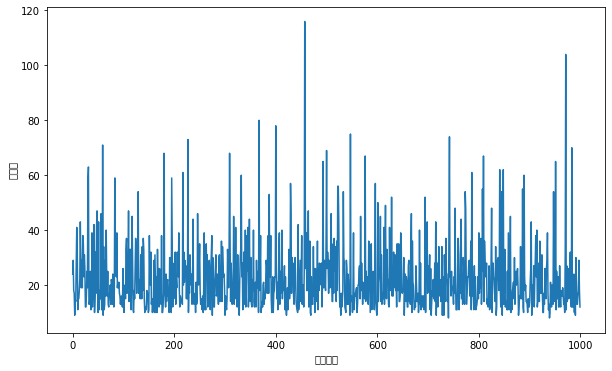

In [66]:
# 将reward列表打印出来
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #解决中文显示乱码问题，也可使用其他字体

plt.figure(figsize=(10,6))
plt.plot(reward)
plt.ylabel("总回报")
plt.xlabel("回合次数")

In [67]:
print ("平均回报为：",np.mean(reward))

平均回报为： 22.573


In [68]:
print ("最大回报为：",np.max(reward))

最大回报为： 116


In [69]:
print ("最小回报为：",np.min(reward))

最小回报为： 8


### 5.4.2 实验总结

从以上代码中也可以看出，Gym的核心接口是Env(环境)。作为统一的环境接口，Env包含下面几个核心方法：

+ <font color=#FF9900>env.reset(self)</font>：重置状态，返回新状态（观测值）
+ <font color=#FF9900>env.step(self, action)</font>：推进一个时间步长，返回 <font color=#FF9900>observation, reward, done, info</font> 四元组。当当前状态确定的情况下，每次执行相同的动作返回值相同，此假设是环境与动作交互的基础
+ <font color=#FF9900>env.render(self)</font>：弹出一个新的窗口，重绘环境的一帧
+ <font color=#FF9900>env.close(self)</font>：关闭环境，并清除内存


在上面代码中使用了<font color=#FF9900>env.step()</font>函数来对每一步进行仿真，在Gym中，<font color=#FF9900>env.step()</font>会返回 4 个参数：

+ 观测<font color=#FF9900>Observation (Object)</font>：当前step执行后，环境的观测(类型为对象)

+ 奖励<font color=#FF9900>Reward (Float)</font>: 执行上一步动作(action)后，智能体(agent)获得的奖励(浮点类型)，不同的环境中奖励值变化范围也不相同，但是强化学习的目标就是使得总奖励值最大

+ 完成<font color=#FF9900>Done (Boolean)</font>: 表示回合是否已经终止。当<font color=#FF9900>Done</font>为True 时，就表明当前回合终止

+ 信息<font color=#FF9900>Info (Dict)</font>: 可以记录调试过程的诊断信息。在单摆车案例中，不会使用到这个info，始终为空值

+ 在 Gym 仿真中，每一次回合开始，需要先执行<font color=#FF9900>reset()</font>函数，返回初始观测信息，然后根据标记<font color=#FF9900>Done</font>的状态，来决定是否进行下一次回合

<font color=#FF9900>step()</font>函数非常重要，可以翻译成时步函数(time step function)，他表示我们让系统“向前”走“一步”、“一个时间间隔”或“一帧”等，也就是在时间上向前进行最小的一个单位。

注意：
以上代码执行step函数，返回的也是四个数字的列表，这个列表与状态不同，分别为状态，回报，Done，Info。其中，状态自身为四元组列表，内部结构为： $[x,\hat{x},\theta,\hat{\theta}]$; 回报表示当前执行step函数以后的回报，每一次执行一次回报为1(在优化整体策略时，我们需要额外设置全局变量总回报，将每一次得到的回报进行加总)； Done表示当前回合是否结束，每一次执行step()都会有所变化，Done=False时，小车还可继续运行，Done=True时，回合失败结束；不要将step函数返回的四元组与状态本身的四元组混淆。

以上实验中可以看出，在随机选择动作的情况下，小车很难达到回合胜利结束（回报达到200），平均回报仅为22左右。我们的目标是，经过强化学习的训练，智能体能够知道小车在什么状态下执行什么动作，最终使得小车的综合平均回报能够达到或大于200。


## 5.5. 实验：利用爬山算法进行强化学习

本实验将改变随机选择动作的策略，系统性地选择优化动作来实现完成回合的目标。

### 5.5.1 爬山算法（Hill Climbing）

【实验概述】

处理单摆车的时候我们用到的状态使用四个变量来衡量的，即，小车的位移，速度，单摆的角度，单摆的角速度。四个变量在实际估计时，处理会相对复杂。为了简化问题，我们可以创建一个新的四维向量，叫做权值，也叫权向量。使权值与原有的状态四元组做向量的点乘积，这样得到一个一维数字，作为新的状态变量，这个一维状态变量在利用爬山法学习时有很大便利性。

爬山算法属于我们在第四部分中介绍的蒙特卡罗算法中的一种。它是一种局部择优的启发式方法，是对深度优先搜索的一种改进。爬山算法从当前节点开始和周围的邻居节点的值进行比较。 如果当前节点是最大的，那么返回当前节点，作为最大值(即山峰最高点)；反之就用最高的邻居节点来替换当前节点，从而实现向山峰的高处攀爬的效果。如此循环，直到遍历周边所有的点，达到最高的点。这个算法的优点是避免遍历全局，通过启发选择部分节点，从而达到提高效率的目的。缺点是因为不是全局搜索，所以结果可能不是最佳,也就是说有可能只能找到局部最优值而不是全局最优值。

【实验目的】

+ 创建新的四维权值,做原状态变量和新权值的点乘积,得到一维变量以简化状态描述

+ 根据得到的新的一维变量指定相应的动作：

    如一维状态变量s>=0, 则动作action=1； 如一维状态s<0, 动作action=0。以下简称“零一规则”
    
    
+ 通过爬山算法进行多回合实验进行优化,最终确定在“零一规则”中的最优权值

+ 将此权值应用于“零一规则”施加于单摆车, 最终达到每一回合高概率达到总回报200,从而完成单摆车任务

### 5.5.2 实验：爬山算法的实现

【实验步骤】

+ 逐行键入以下代码，观察输出，确保输出和示例一致


In [78]:
# 导入相关库
import numpy as np 
np.set_printoptions(precision=4, suppress=True)

import gym

In [79]:
# 设定种子值，以确保以下产生的随机种子确定
seed=100
np.random.seed(seed)

# 定义一个权值向量
weights = np.random.random(4) * 2 - 1
weights

array([ 0.0868, -0.4433, -0.151 ,  0.6896])

In [80]:
# 此处需要注意随机种子的使用特征：与上一个单元格做对比，再次使用相同的随机数，需要再次确定随机种子

weights = np.random.random(4) * 2 - 1
weights

array([-0.9906, -0.7569,  0.3415,  0.6517])

请同学们往复执行上两个单元格，可以看到不同的结果！

接下来重新建立仿真环境。

In [90]:
# 建立单摆车仿真环境
env = gym.make('CartPole-v0')

# 设置仿真环境中的种子值，确保以下产生的环境变量每次确定
env.action_space.seed(seed)

state = env.reset()
state

(array([ 0.0193, -0.0169, -0.0285, -0.0274], dtype=float32), {})

In [84]:
import random
a=random.choice([0,1])

#执行时步函数
state, reward, done, _, info = env.step(a) 
state

array([ 0.0385,  0.1558,  0.0456, -0.2918], dtype=float32)

同样，可以往复执行上两个单元格，或只执行上一个单元格，观察区别。四维权值和四维状态已经确定，可以做点乘积，得到一维状态。

In [85]:
# 权值向量乘以初始状态，得到一个一维的数据，表示状态，这是一种降维的典型方法
s = np.dot(state, weights)
s

-0.3306320625070613

In [86]:
# 定义动作，如果一维状态<0，则动作为0,否则动作为1；注意此处的python语句
a = 0 if s<0 else 1
a

0

到此为止，我们完成了一个简单的降维方法：将小车状态的四元组变量乘以一个权值，将其装换为一个一维状态变量。并且定义了这个一维状态变量所对应的动作。接下来进入爬山法学习过程。

In [106]:
# 定义一个执行一个回合的函数。输入为环境和权值，返回总回报
# 此函数执行之前首先利用np.random.seed指定了固定的随机种子，所以在权值和状态都固定的情况下，此函数返回总回报


def run_episode2(env, weights):  # 注意：自定义函数run_episode2传递的第一个参数为env,env需要在之前事先定义好，
                                 # 为env = gym.make('CartPole-v0')，目的是为了接下来调用env.reset()使用
    
    state = env.reset()[0]
    
    #定义总回报
    treward = 0
    
    for _ in range(200):
        
        #状态降维
        s = np.dot(state, weights)
        
        #根据降维后的状态选择对应的动作
        a = 0 if s < 0 else 1
        
        state, reward, done, _, info = env.step(a)
        
        treward += reward
        
        if done:
            break
    return treward

<font color=#FF9900>run_episode2()</font>的目的是：在给定权重的情况下，通过“零一规则”返回一个回合中此权重的总回报。接下来我们可以穷举很多权重，分别带入<font color=#FF9900>run_episode2()</font>，将最优权重保留下来。由于<font color=#FF9900>run_episode2()</font>能够运行的回合数目是有限的，所以此算法是局部最优，非全局最优。

In [107]:
# 设置三个环境中的随机种子函数
def set_seeds(seed=100):
    import random
    import numpy as np
        
    random.seed(seed)
    np.random.seed(seed)
    env.action_space.seed(seed)

# 设置三个环境中的随机种子
set_seeds()

# 定义回合执行次数
num_episodes = 1000


# 首先记录besttreward(best total reward)=0
# 接下来迭代的过程中首先指定权值，调用run_episode2计算一维状态，并根据一维状态变量持续更新状态，加总回报，返回回报
besttreward = 0


# 学习num_episodes次或进行num_episodes个回合。
# 注意python左闭右开区间，总数为num_episodes
for e in range(1, num_episodes + 1):

    weights = np.random.rand(4) * 2 - 1 #注意此位置，由于之前的np.random.seed(100)已经产生过一次随机数了，这个随机种子只管一次使用
                                        #再次使用相同的随机数，需要再次确定随机种子，所以此位置每次显示的是不同的权值
    
    treward = run_episode2(env, weights) #运行run_episode2函数（环境，权值），返回在此环境和权值给定的情况下的回报

    if treward > besttreward: #如果产生回报大于当前最好回报，则更新最好回报和对应的权值
        besttreward = treward
        bestweights = weights
        if treward == 200:
            print(f'成功  | episode={e}')
            break
        print(f'更新  | episode={e}')

更新  | episode=1
更新  | episode=4
成功  | episode=13


接下来，我们分步解释一下爬山法的学习过程:

+ 首先，在<font color=#FF9900>run_episode2()</font>函数中, 给定的权值是不变的，权值作为输入传递到函数内部。在函数内部状态改变，是通过运行<font color=#FF9900>env.step()</font>函数完成的

+ 其次，在爬山算法代码中（以上单元格），进入循环（每一回合）以后，每次都随机指定权值weights=np.random.rand(4) * 2 - 1

+ 权值点乘当前状态得到新的降维后的状态

+ 经过对比以后，将对应的动作0或者1输入给系统，系统返回给<font color=#FF9900>run_episode2()</font>函数此环境下和此权值下的总回报treward 

+ 经过多次迭代（num_episodes或称多个回合）， 如果哪一个权值能够在随机状态的情况下达到执行动作200次，即回报为200，这一权值胜出并得以保留在bestweights，其余之前每次迭代的权值都被丢弃

+ 最优权值bestweights可以使小车运行200次，即完成了任务

+ 这个最优权值就是爬山法学习的结果

In [108]:
print ("最佳权值：",bestweights)

最佳权值： [-0.4282  0.7048  0.95    0.7697]


In [ ]:
%%time

# 查看训练后结果

#创建结果列表
res = []

for _ in range(10000):
    treward = run_episode2(env, bestweights) #使用bestweights，随机运行10000次
    res.append(treward)
    
res[:10]

In [ ]:
# 查看各个回合的回报
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #解决中文显示乱码问题，也可使用其他字体

plt.figure(figsize=(10,6))
plt.ylim(0,300)
plt.plot(res)
plt.ylabel("总回报")
plt.xlabel("回合次数")

In [49]:
# 计算平均结果
np.mean(res)

200.0

### 5.5.3 实验总结

综上所述，我们利用权值的修改，经过多次迭代确定了在给定环境下的最优权值，并利用了最优权值进行了再次实验。实验的结果每一次都可以成功。这就是我们想要的结果。需要指出的是，此权值与动作的对应关系（零一规则）与迷宫实验的Q表有着异曲同工之处，他们都指导了智能体的在给定状态下做哪一个固定的动作，这个动作已经被验证过，有最大的回报价值。

对于爬山算法的实现能够达到近乎完美的效果，在实务中并不多见。究其原因，施加于小车的动作及小车状态的变化完全遵循物理规律。这个物理规律可以用函数式表达（具体规则查看：<font color=#FF9900>C:\Users\用户名\anaconda3\Lib\site-packages\gym\envs\classic_control\cartpole.py</font>）。但是在社会学实践中，往往结果不会这么完美。


总结一下，第五部分给我们提供了两方面的重要启示：

一方面，在一个未知环境中，环境可以用一个或多个变量来描述。这些变量大多情况是一个连续型变量，理论上，它有无数种取值（就像单摆车的状态变量），也就是说我们没有办法准确地列出所有状态的列表。

另一方面，我们能够执行的动作相对较少，向左0或者向右1，我们想知道在什么样的环境下执行哪个动作是最优的。

类似于此类问题，状态无限而动作有限的问题，可以通过爬山法（蒙特卡洛模拟法）解决。我们在给定“零一规则”，a = 0 if s < 0 else 1 的情况下，确定了最优权值bestweights，需要指出的是，此最优权值不是唯一的。同学们可以试着将<font color=#FF9900>set_seeds()</font>（注释“设置三个环境中的随机种子”之下的 set_seeds()）注释掉，比对当前结果。注意，<font color=#FF9900>set_seeds()</font>函数能够控制每次随机选择是确定值还是随机值，且仅对下一次执行有效。